EN.605.621.8VL.FA20 : Project midpoint will be due in module 7 -->

Introduction to the algorithm of your choice. 

1.1 Theoretical details about the algorithm and theoretical complexity 

1.2 Details about the algorithm of choice (Why did we study this algorithm? What pieces does it have? Data structures, algorithm strategies? Algorithm kind?)
Canonical test data (might be a script to generate it) 

2.1 Sample test data to run with the algorithm (this can be interesting examples to show the utility of the algorithm)

The actual code of the algorithm which can indeed run

Evaluation plan - empirical

In [379]:
import pickle as pk
import numpy as np
from typing import List
import matplotlib.pyplot as plt
from random import randint
import random
from sklearn.model_selection import train_test_split

## 1. ALGORITHM INTRODUCTION

### 1.1. Theoretical details and algorithm theoritical complexity

### 1.2. Algorithm details

### 2. Canonical Test Data

In [380]:
# The following scripts generates data of various size

In [394]:
# linear function to generate y values from given X values

def linear_function(X, noise):
    data = {}
    mu = 0
    sigma = 2
    gaussian_randomization = np.random.normal(mu, sigma, len(X))    
    y = (2*X) + 2 + (gaussian_randomization*noise)
    return y # list of y values and data{X:y} dict

In [396]:
# generate X and y values and a data dict {X:y} for storage
def generate_data_values(array_size, noise):
    # generate x values from the test data
    x_list = np.linspace(1.0, 100.0, num=array_size, endpoint=False, dtype=float)
    # convert x values to an numpy array
    X = np.array(x_list)
    y = linear_function(X, noise)
    data = dict(zip(X, y)) # create a dictionary {X:Y} for pickle storage
    return data

### 2.1 Writing and reading data using Pickle

In [397]:
# pickling data 
def generate_canonical_test_files(array_size, noise=.5):
    for i in range(len(array_size)):
        filename = 'data_' + str(array_size[i])
        outfile = open(filename, 'wb')
        # generate values
        data = generate_data_values(array_size[i], noise)
        # write values to a file
        pk.dump(data, outfile)
        print(filename + ' created')
        outfile.close()

In [398]:
# unpickling data
def read_data_file(filename):
    infile = open(filename, 'rb')
    data = pk.load(infile)
    infile.close()
    return data

### 2.2 Prepare data for algorithm processing

In [399]:
# parse loaded Pickle dictionary into X, Y lists and a points in (X,Y) format
def parse_data_dict(adict):
    X, y = zip(*adict.items())
    return np.array(X), np.array(y)
        

## 3. ALGORITHM

Source: Raheem, Abdul Hafeez Abdul. “Linear Regression from Scratch.” Medium, Towards Data Science, 11 Nov. 2018, towardsdatascience.com/linear-regression-from-scratch-cd0dee067f72.

In [400]:
def ordinary_least_squares(X, y, N):
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    numerator = 0
    denominator = 0
    
    for i in range(N):
        numerator += (X[i] - mean_x) * (y[i] - mean_y)
        denominator += (X[i] - mean_x) ** 2
    
    b1 = numerator/denominator
    b0 = mean_y - (b1 * mean_x)
    
    return b1, b0


In [401]:
def calculate_y_pred(X, b0, b1, N):
    y_pred = b0 + b1*X
    return y_pred

In [402]:
def calculate_rmse(X, y, y_pred, N):
    rmse = 0
    for i in range(N):
        y_actual = y[i]        
        rmse += (y_pred - y_actual) ** 2
    rmse = rmse/N
    return np.sqrt(rmse)

In [403]:
def calculate_r_squared(X, y, b0, b1, y_pred, mean_y, N):
    ssr = 0
    sst = 0
    for i in range(N):
        ssr += (y[i] - y_pred[i]) ** 2
        sst += (y[i] - mean_y) ** 2
    
    r_squared = 1 - (ssr/sst)
    return r_squared

In [408]:
array_size = [10,100]
generate_canonical_test_files(array_size, noise=2)
filename = 'data_100'
data = read_data_file(filename)
X, y = parse_data_dict(data)
print('len X' + str(len(X)))
print('len y' + str(len(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
b1, b0 = ordinary_least_squares(X_train, y_train, N_train)   
print('b1: ' + str(b1))
print('b0: ' + str(b0))
y_pred_train = calculate_y_pred(X_train, b0, b1, N_train)
y_pred_test = calculate_y_pred(X_test, b0, b1, N_test)
rmse = calculate_rmse(X_train, y_train, y_pred_train, N_train)
print('rmse: ' + str(rmse))
r2 = calculate_r_squared(X_train, y_train, b0, b1, y_pred_train, np.mean(y_train), N_train)
print('r2: ' + str(r2))



data_10 created
data_100 created
len X100
len y100
b1: 1.9813677298324635
b0: 3.0251957390514264
rmse: [ 57.34486582  92.50865355  74.67186818  59.27498421  67.08544806
  90.20270758  60.52754605 105.34386181  99.62783901  70.40176927
  96.42889678  57.21051354  87.93475168  72.18280224 100.4355986
 106.17155603  64.1386316   63.24758558  64.6018833   88.68633495
  56.8394073   65.56259139 102.87692662 103.69648297  73.41167976
  84.24755779  82.09637887  75.96180922  60.87617324  93.28525884
  77.28001301 109.50761684  87.18772246  62.00343106 101.24641462
  77.94926656 104.51881638  62.40549246  63.68711525  94.06567866
  57.66269793 110.34766636  57.09269593  58.73701386  56.75472655
  65.07661972  57.49563688  66.05955036  60.19288197 107.00183759
  79.3072203   59.87241516  58.4908462   56.99151556 108.6699253
  58.04511363  74.0379591   67.61390157 102.06021423  58.99846058
  61.6143594   86.44536534  62.82029419  70.98686176 112.88143574
  56.788614    81.39032249 111.19002044  

### 3.1. Plotting data

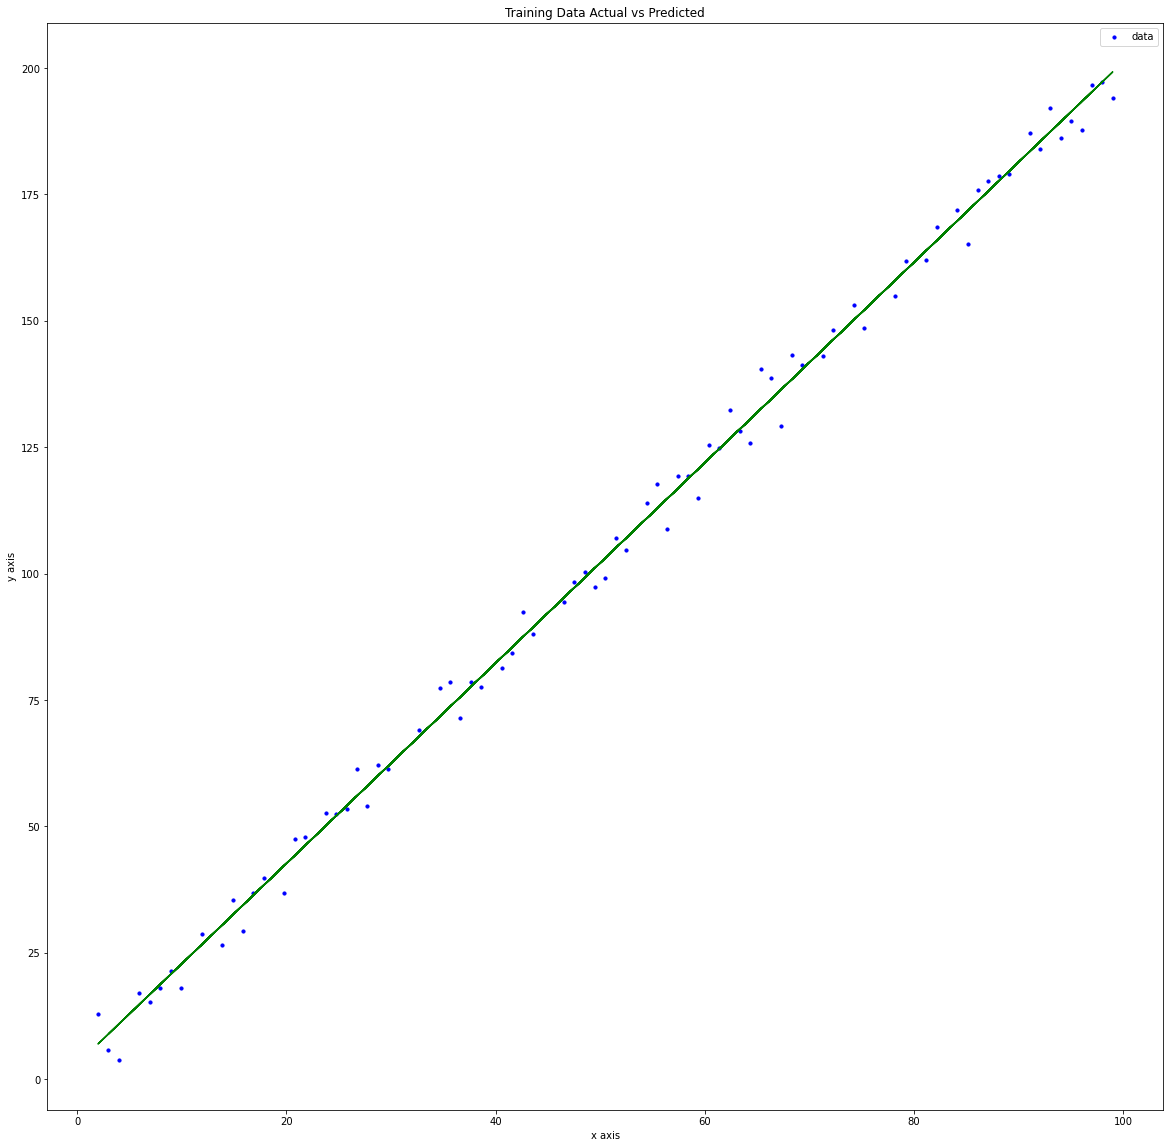

In [410]:
# increase size of plot
plt.figure(figsize=(20,20))
# plotting points
plt.scatter(X_train, y_train, label='data', color='blue', s=10)
# plotting predicted line
plt.plot(X_train, y_pred_train, color='green')
# add x-label
plt.xlabel('x axis')
# add y-label
plt.ylabel('y axis')
# plot title
plt.title('Training Data Actual vs Predicted')
# show legend
plt.legend()
#show graph
plt.show()

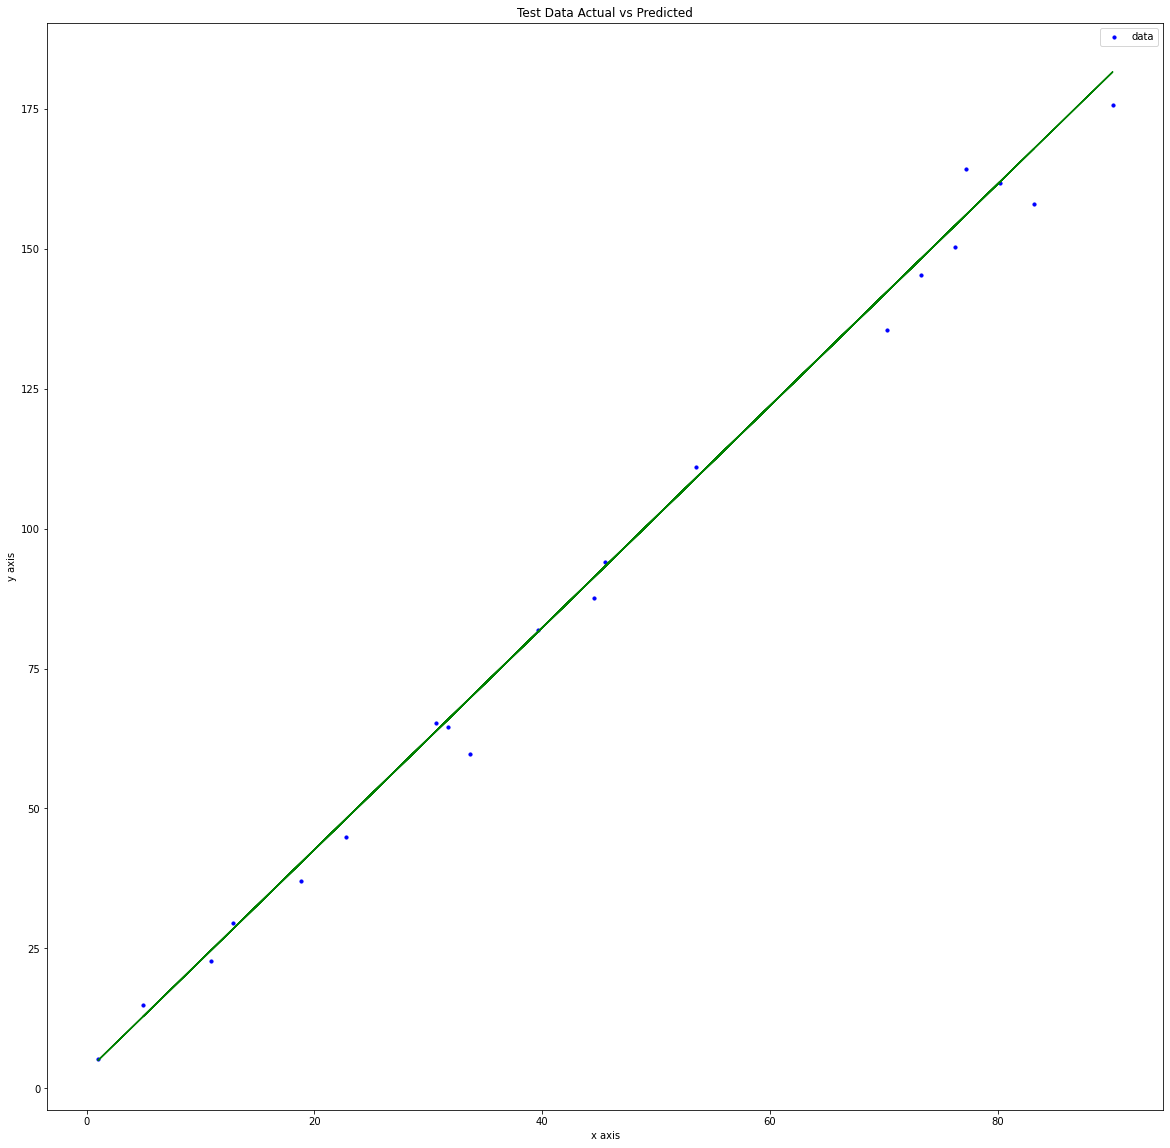

In [411]:
# increase size of plot
plt.figure(figsize=(20,20))
# plotting points
plt.scatter(X_test, y_test, label='data', color='blue', s=10)
# plotting predicted line
plt.plot(X_test, y_pred_test, color='green')
# add x-label
plt.xlabel('x axis')
# add y-label
plt.ylabel('y axis')
# plot title
plt.title('Test Data Actual vs Predicted')
# show legend
plt.legend()
#show graph
plt.show()

## 4. EMPIRICAL PLAN